# Домашнее задание №2
#### Виталий Емельянов
#### 25 ноября 2017 г.

Для измерения latency и throughput используются лог-файлы, полученные в результате экспериментов.

## I. Подготовка данных

### Считывание лог-файла

In [100]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

with open("log4j-application-100-1500.log", "r") as f:
    lines = f.readlines()

### Парсинг лог-файла

In [101]:
parsed_lines = []
for line in lines:
    vals = line.split(" ")
    hour, minute, sec = map( lambda x: int(x), vals[1].strip().split(":"))
    parsed_lines.append([datetime.datetime(1,1,1, hour, minute, sec), vals[6], vals[-2].strip(), vals[-1].strip()])

In [102]:
df = pd.DataFrame(parsed_lines, columns=["time", "message_id", "receiver", "address"])

### Вычисление latency
В качестве latency мы принимаем среднее время доставки сообщения. Для каждого сообщения вычисляется время его нахождения в сети, вычисляется среднее значение полученных чисел, а также стандартное отклонение.

In [103]:
send_times = df.groupby(['message_id','address'])['time'].min().reset_index().sort_values("message_id")
receive_times = df.groupby(['message_id','address'])['time'].max().reset_index().sort_values("message_id")

In [104]:
print (receive_times["time"] - send_times["time"]).mean()
print (receive_times["time"] - send_times["time"]).std()

0 days 00:00:04.048666
0 days 00:00:03.052514


### Вычисление throughput
Для каждой вершины мы вычисляем среднее время обработки одного сообщения, затем усредняем данные значения по всем машинам, а также вычисляем стандартное отклонение.

In [105]:
send_times = df.groupby(['receiver'])['time'].min()
receive_times = df.groupby(['receiver'])['time'].max()

throughput = (receive_times - send_times) / df.groupby(['receiver']).count()["address"]
print throughput.mean()
print throughput.std()

0 days 00:00:00.045164
0 days 00:00:00.003783


## II. Графики зависимости latency от количества сообщений в сети

<b>Примечание.</b> Средние значения и стандартные отклонения посчитаны с помощью процедуры, описанной выше.

### 10 вершин в кольце

In [55]:
num_messages = [100, 500, 1000, 1500]
mean_latency = np.array([0.07, 0.078,0.097, 0.137])
std_latency = np.array([0.256, 0.268, 0.296, 0.344])

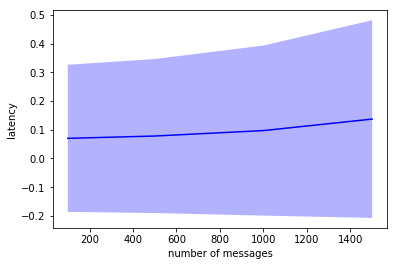

In [56]:
fig, ax = plt.subplots(1)
plt.plot(num_messages, mean_latency, color="blue")
ax.fill_between(num_messages, mean_latency+std_latency, mean_latency-std_latency, facecolor='blue', alpha=0.3)
plt.xlabel("number of messages")
plt.ylabel("latency")

### 100 вершин  в кольце

In [133]:
num_messages = [100, 500, 1000, 1500]
mean_latency = np.array([1.31, 1.644, 2.819, 4.048])
std_latency = np.array([0.812, 1.869, 2.479, 3.05])

Ниже представлена зависимость latency от количества сообщений.

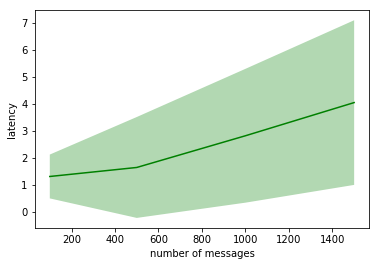

In [134]:
fig, ax = plt.subplots(1)
plt.plot(num_messages, mean_latency, color="green")
ax.fill_between(num_messages, mean_latency+std_latency, mean_latency-std_latency, facecolor='green', alpha=0.3)
plt.xlabel("number of messages")
plt.ylabel("latency")

### III. Вычисление throughput

### 10 вершин в кольце

In [79]:
num_messages = [100, 500, 1000, 1500]
mean_throughput = np.array([0.002, 0.003, 0.006, 0.004])
std_throughput= np.array([0.0002, 0.0002, 0.0001, 0.0001])

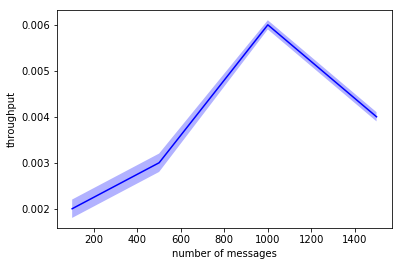

In [80]:
fig, ax = plt.subplots(1)
plt.plot(num_messages, mean_throughput, color="blue")
ax.fill_between(num_messages, mean_throughput+std_throughput, mean_throughput-std_throughput, facecolor='blue', alpha=0.3)
plt.xlabel("number of messages")
plt.ylabel("throughput")

### 100 вершин в кольце

In [106]:
num_messages = [100, 500, 1000, 1500]
mean_throughput = np.array([0.0177, 0.09, 0.063, 0.045])
std_throughput= np.array([0.032, 0.01, 0.007, 0.004])

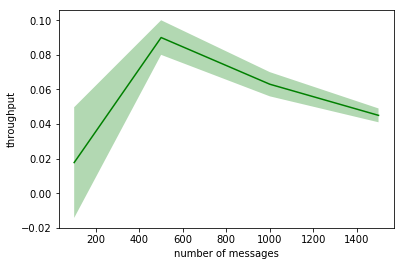

In [107]:
fig, ax = plt.subplots(1)
plt.plot(num_messages, mean_throughput, color="green")
ax.fill_between(num_messages, mean_throughput+std_throughput, mean_throughput-std_throughput, facecolor='green', alpha=0.3)
plt.xlabel("number of messages")
plt.ylabel("throughput")

### IV. Вывод

* С увеличением количества сообщений в сети, как  и ожидалось, увеличивается время доставки сообщения (latency). Однако, в случае малого количества вершин возможно, что пакеты будут доставляться , в среднем, быстрее.

* Для throughput однозначной зависимости вывести не получается. Возможно, что нужно провести большее количество экспериментов либо процедура вычмсления throughput не  совсем корректна.